In [1]:
import sqlite3
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [2]:
from sklearn import preprocessing, decomposition, feature_extraction, feature_selection, model_selection

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
from collections import Counter

dict = Counter(df['salary'])
print(f"dictionary with all classes : {dict}")
print(f"Keys for the different-2 classes : {dict.keys()}")
print(f"dict[' >50K'] : {dict[' >50K']} , dict[' <=50K'] : {dict[' <=50K']}")
print(f"Class 1 percentage : {dict[' >50K']/len(df)*100} , Class 2 percentage : {dict[' <=50K']/len(df)*100}")

dictionary with all classes : Counter({' <=50K': 24720, ' >50K': 7841})
Keys for the different-2 classes : dict_keys([' <=50K', ' >50K'])
dict[' >50K'] : 7841 , dict[' <=50K'] : 24720
Class 1 percentage : 24.080955744602438 , Class 2 percentage : 75.91904425539757


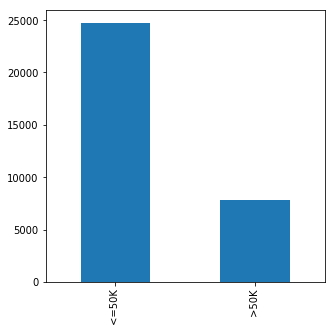

In [9]:
%matplotlib inline

df['salary'].value_counts()

df['salary'].value_counts().plot(kind='bar',figsize=(5,5))

In [10]:
df['salary'] = df['salary'].map({' >50K': 1, ' <=50K': 0})

In [11]:
if df.isna().any().count() :
    df.fillna(value=-99999,axis=1,inplace=True)

In [12]:
df1 = pd.get_dummies(df)

In [13]:
if df1.duplicated().any().sum() :
    df1.drop_duplicates(inplace=True)
df1.shape

(32537, 109)

In [14]:
df_x = df1.drop(['salary'], 1)
df_y = df1['salary']

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=10)
rfc.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


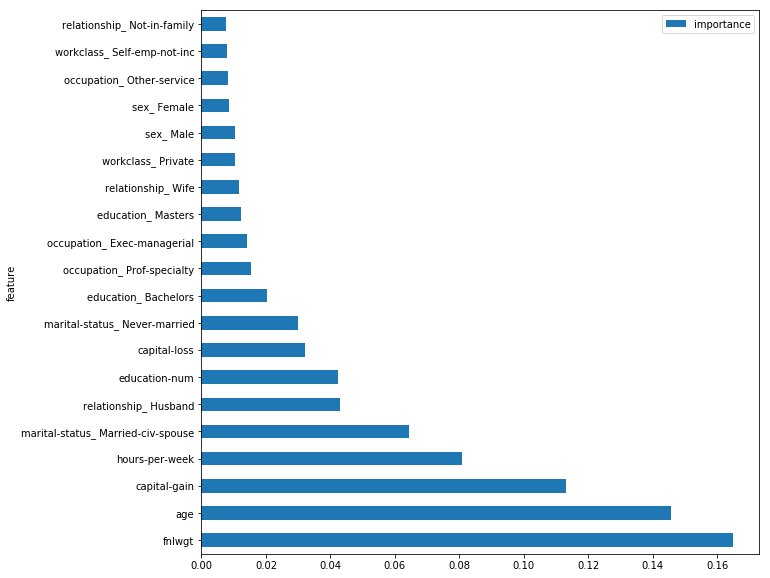

In [16]:
feature_importances[:20].plot(kind='barh',figsize=(10,10))

In [17]:
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=1/3,train_size=2/3, random_state = 11)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.40,train_size =0.60, random_state = 11)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr1 = LogisticRegression()
lr = RFE(lr1, 50)
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=50, step=1, verbose=0)

In [18]:

from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(min_samples_split=10, random_state=55, max_features=50)
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [19]:
from sklearn.ensemble import BaggingClassifier

Boosting = BaggingClassifier(n_estimators=200)
Boosting.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [20]:
rfc = RandomForestClassifier(random_state=55,max_features=50)
rfc.fit(df_x,df_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc

models = pd.DataFrame(index=['train_ras','cv_ras','test_ras','accuracy_score'], 
                      columns=['logistic_regression','decision_tree','random_forest','xgboost'])

models.loc['train_ras','logistic_regression'] = roc_auc_score(y_true=y_train, y_score=lr.predict(x_train))
models.loc['cv_ras','logistic_regression'] = roc_auc_score(y_true=y_cv, y_score=lr.predict(x_cv))
models.loc['test_ras','logistic_regression'] = roc_auc_score(y_true=y_test, y_score=lr.predict(x_test))
models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_train), y_true=y_train)
models.loc['cv_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_train), y_true=y_train)
models.loc['cv_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_cv), y_true=y_cv)
models.loc['test_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=Boosting.predict(x_test).round(), y_true=y_test)

models

,logistic_regression,decision_tree,random_forest,xgboost
train_ras,0.732021,0.899801,0.97822,1
cv_ras,0.729716,0.741519,0.972799,0.764363
test_ras,0.72054,0.75134,0.976921,0.768677
accuracy_score,0.817813,0.828877,0.987922,0.852204


### Now we will use Random_Forest

In [22]:
confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)


array([[8200,   14],
       [ 117, 2515]], dtype=int64)

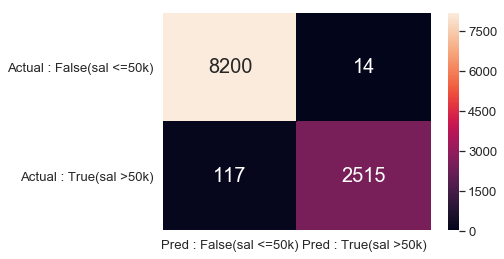

In [23]:
import seaborn as sn

arr=confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

df_cm = pd.DataFrame(arr, range(2), range(2))

sn.set(font_scale=1.2)
sn.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 20},
           fmt='.4g',
           xticklabels=['Pred : False(sal <=50k)','Pred : True(sal >50k)'], 
           yticklabels=['Actual : False(sal <=50k)','Actual : True(sal >50k)'],)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
precision_score(y_true=y_test, y_pred=rfc.predict(x_test))
recall_score(y_true=y_test, y_pred=rfc.predict(x_test))
f1_score(y_true=y_test, y_pred=rfc.predict(x_test))

0.9746173222243752

In [25]:
print(classification_report(y_true=y_test, y_pred=rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8214
           1       0.99      0.96      0.97      2632

   micro avg       0.99      0.99      0.99     10846
   macro avg       0.99      0.98      0.98     10846
weighted avg       0.99      0.99      0.99     10846



ROC AUC: 0.00


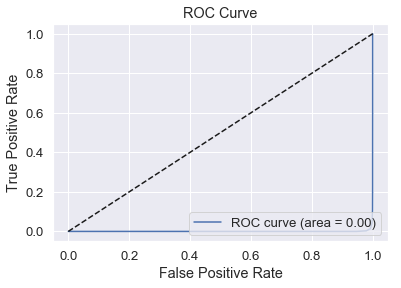

ROC AUC: 1.00


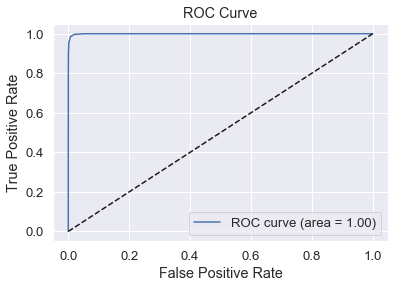

In [26]:
import matplotlib.pyplot as plt

for i in range(2): # as there are two classes in our dataset for prediciton
    
    
    fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(x_test)[:,i])

    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %0.2f' % roc_auc)

    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


# we can conclude that Random_Forest is best suitable here